In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
loans = pd.read_csv('loan_data.csv')

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


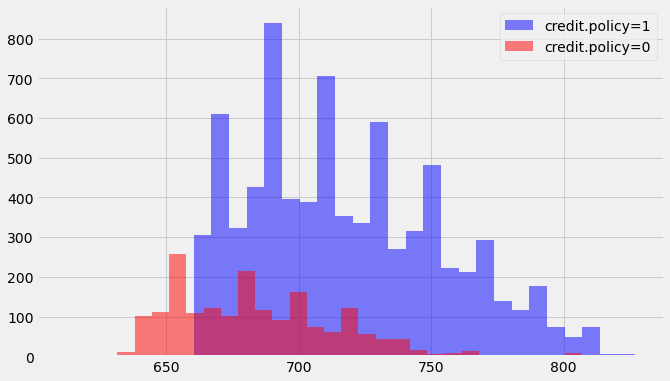

In [7]:
plt.figure(figsize=(10, 6))
loans[loans['credit.policy'] == 1]['fico'].hist(bins=30, color='blue', alpha=.5, 
                                                label='credit.policy=1')

loans[loans['credit.policy'] == 0]['fico'].hist(bins=30, color='red', alpha=.5, 
                                                label='credit.policy=0')
plt.legend()
plt.show()

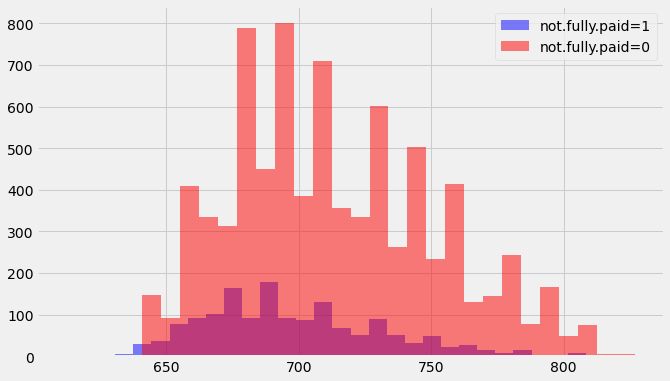

In [8]:
plt.figure(figsize=(10, 6))
loans[loans['not.fully.paid'] == 1]['fico'].hist(bins=30, color='blue', alpha=.5, 
                                                label='not.fully.paid=1')

loans[loans['not.fully.paid'] == 0]['fico'].hist(bins=30, color='red', alpha=.5, 
                                                label='not.fully.paid=0')
plt.legend()
plt.show()

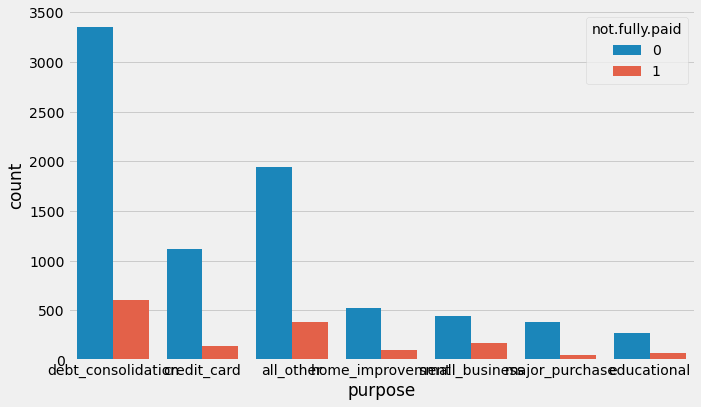

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', data=loans, hue='not.fully.paid')
plt.show()

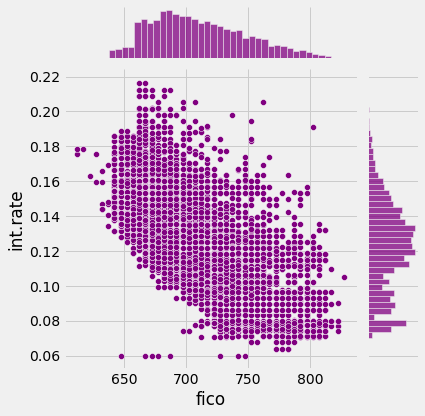

In [10]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')
plt.show()

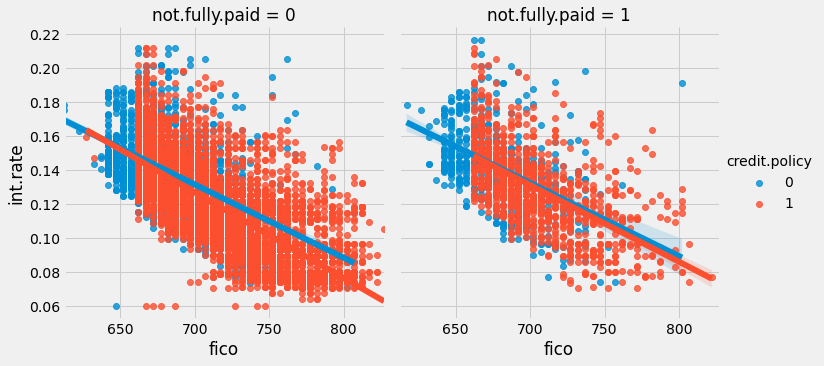

In [11]:
sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy', col='not.fully.paid')
plt.show()

In [12]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
cat_feats = loans['purpose']

In [14]:
final_data = pd.get_dummies(loans, columns=['purpose'], drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = final_data.drop('not.fully.paid', axis=1)

In [17]:
y = final_data['not.fully.paid']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [22]:
pred = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [25]:
print(confusion_matrix(y_test, pred))

[[2003  428]
 [ 345   98]]


In [26]:
from  sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
prediction = rfc.predict(X_test)

In [30]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [31]:
print(confusion_matrix(y_test, prediction))

[[2420   11]
 [ 431   12]]
